In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

scikit-allel 1.3.2


In [2]:
vcffile = 'zenodo/1kGP_high_coverage_Illumina.chrX.filtered.SNV_INDEL_SV_phased_panel.v2.genic.wheader.vcf.gz'

In [3]:
callset = allel.read_vcf(vcffile)

/home/nbserver/anaconda3/lib/python3.7/site-packages/allel/io/vcf_read.py:1732: UserWarning: invalid INFO header: '##INFO=<ID=END2,Type=Integer,Number=1,Description="Position of breakpoint on CHR2">\n'
  warnings.warn('invalid INFO header: %r' % header)


In [4]:
genotypes = allel.GenotypeChunkedArray(callset['calldata/GT'])

In [5]:
pc_het = genotypes.count_het(axis=0)

In [6]:
pc_missing = genotypes.count_missing(axis=0)[:]

In [7]:
len(genotypes)

1339235

In [8]:
pc_missing = pc_missing/len(genotypes)

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame([pc_het,pc_missing], columns=callset['samples'], index=['Het Count', 'Percent Missing']).T

In [11]:
metadata_df = pd.read_csv('data/1kGP_individual_metadata.csv', index_col=0)

In [12]:
df = df.join(metadata_df)

In [13]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

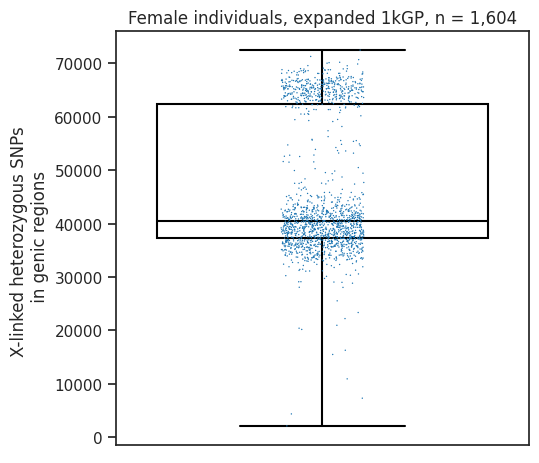

In [14]:
fig, ax = plt.subplots(1,1)
sns.boxplot(y='Het Count', data=df[df['Sex'] == 'female'], **PROPS, ax=ax)
sns.stripplot(y='Het Count', data=df[df['Sex'] == 'female'], s=1, ax=ax)
ax.set_ylabel('X-linked heterozygous SNPs \n in genic regions')
ax.set_title('Female individuals, expanded 1kGP, n = 1,604')
ax.set_xticks([])
ax.set_box_aspect(1)
plt.tight_layout()
plt.savefig('figures/Fig1E.pdf')
plt.show()

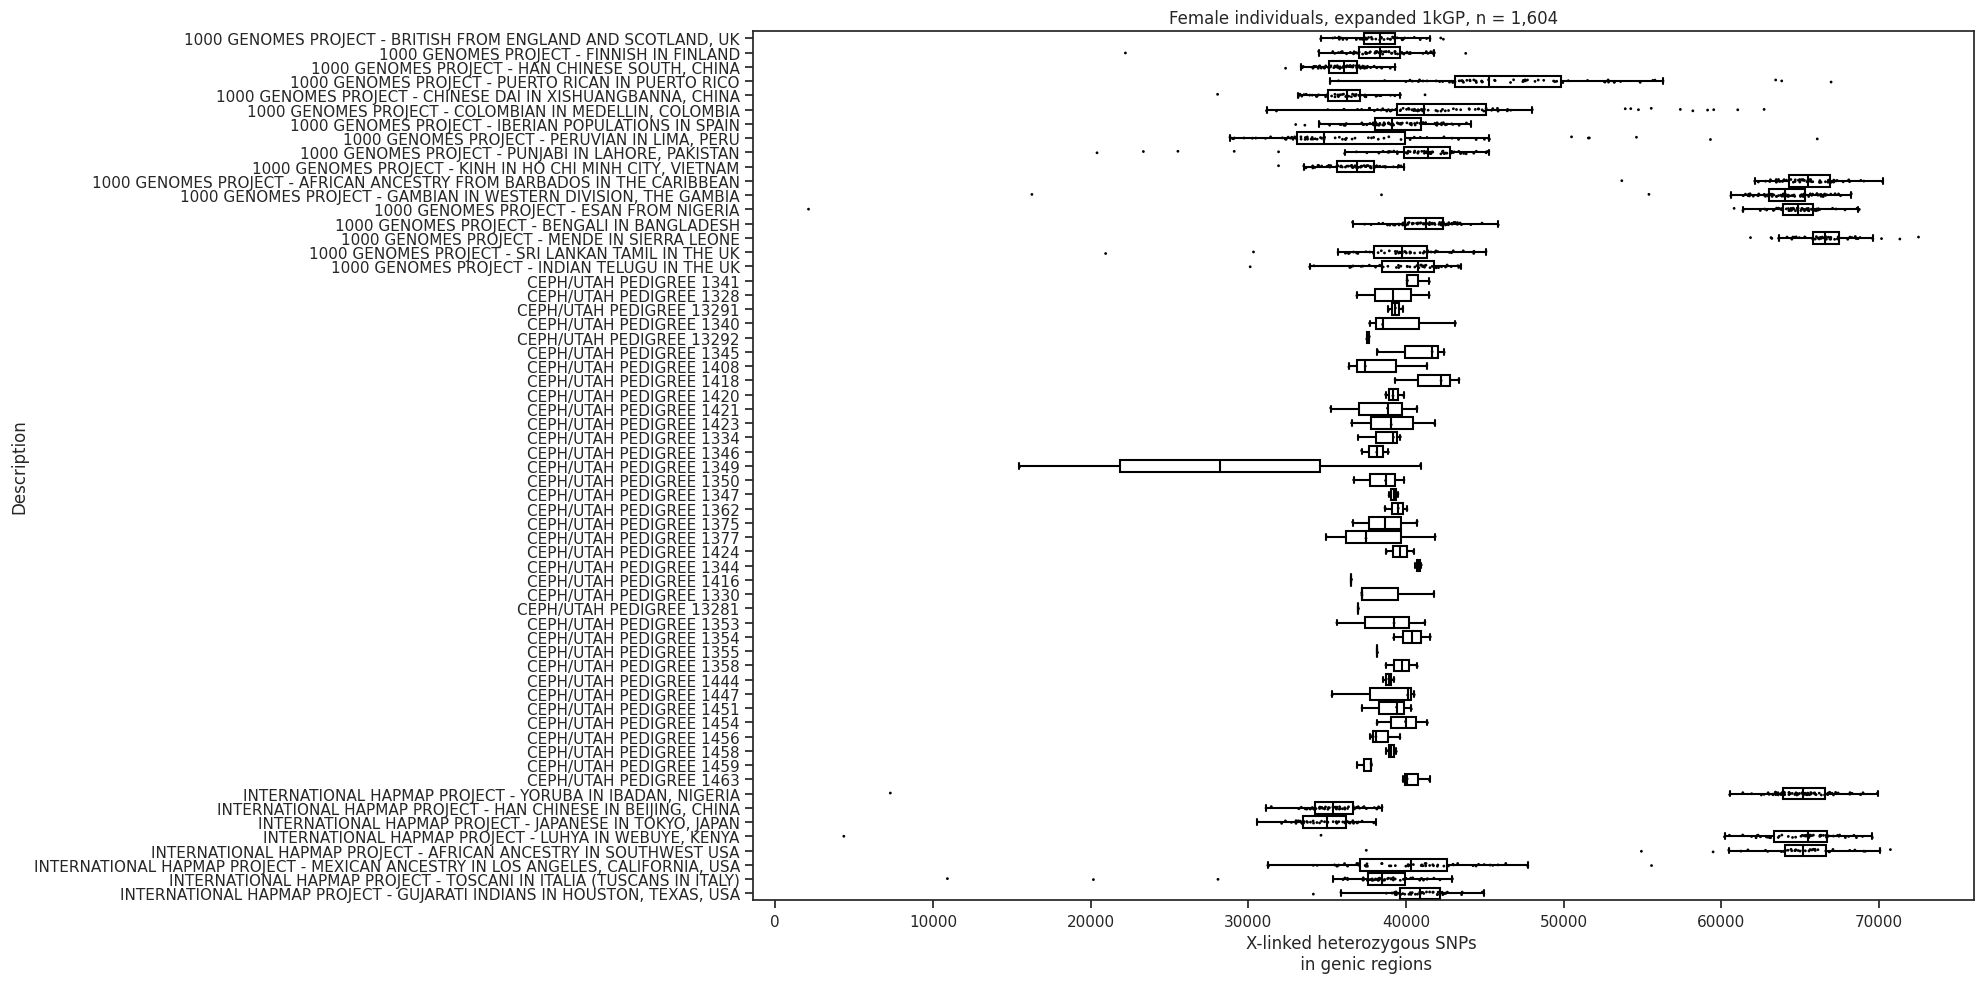

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.boxplot(y='Description', x='Het Count', data=df[df['Sex'] == 'female'], **PROPS, ax=ax, showfliers=False)
sns.stripplot(y='Description', x='Het Count', data=df[df['Sex'] == 'female'], s=2, ax=ax, color='black')
ax.set_xlabel('X-linked heterozygous SNPs \n in genic regions')
ax.set_title('Female individuals, expanded 1kGP, n = 1,604')
plt.tight_layout()
plt.savefig('figures/Supp_Fig_2.pdf')
plt.show()